In [219]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pypyodbc as odbc
import squarify
import pyodbc
import requests
from io import StringIO
from sklearn.linear_model import LinearRegression
print('Completed import lib')

Completed import lib


# Take dataset

In [220]:
# Với file raw từ github cần thao tác như sau
url = 'https://raw.githubusercontent.com/DK-Hieu/House_price_prediction/main/data.csv'
req = requests.get(url)
data = StringIO(req.text)
p_house = pd.read_csv(data)

In [221]:
p_house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [222]:
p_house['waterfront'].unique()

array([0, 1], dtype=int64)

In [223]:
a = np.array(list(set(p_house['bathrooms'])))
a.sort()
a

array([0.  , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75,
       6.25, 6.5 , 6.75, 8.  ])

In [224]:
p_house['bathrooms'].unique()

array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
       4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 0.  , 6.75])

In [225]:
p_house.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [226]:
p_house.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


D:\anacoda\envs\vscode\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


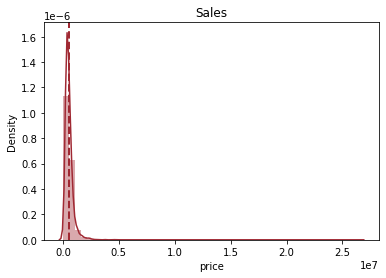

In [227]:
sns.distplot(p_house['price'],color=colors[7])
plt.axvline(x=p_house['price'].mean(), color=colors[7], linestyle='--', linewidth=2)
plt.xlim()
plt.title('Sales');

## delete price outline

In [228]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

https://www.kaggle.com/galaxygeorge/house-price-prediction-eda-fe-model#Loading-Dataset

In [229]:
p_house1 = remove_outliers(p_house, 'price')

Outliers of price are removed



D:\anacoda\envs\vscode\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


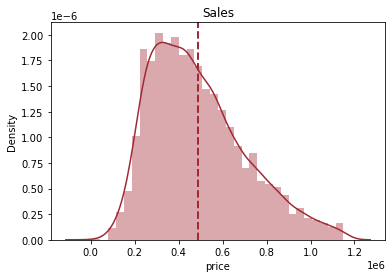

In [230]:
sns.distplot(p_house1['price'],color=colors[7])
plt.axvline(x=p_house1['price'].mean(), color=colors[7], linestyle='--', linewidth=2)
plt.xlim()
plt.title('Sales');

# EDA

In [231]:
p_house1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [232]:
p_house1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.309080,0.476807,0.631773,0.098622,0.276608,0.072393,0.225239,0.047677,0.543391,0.229384,0.062516,-0.070787
bedrooms,0.309080,1.000000,0.521846,0.597027,0.060086,0.151722,-0.033018,0.061483,0.015454,0.463515,0.307105,0.155562,-0.066787
bathrooms,0.476807,0.521846,1.000000,0.722429,0.088196,0.492004,0.014619,0.118122,-0.141801,0.645078,0.219447,0.516759,-0.240410
sqft_living,0.631773,0.597027,0.722429,1.000000,0.202208,0.333174,0.026150,0.196369,-0.083133,0.857448,0.367880,0.332638,-0.137962
sqft_lot,0.098622,0.060086,0.088196,0.202208,1.000000,-0.002050,0.024339,0.075834,0.006598,0.200348,0.025660,0.040410,-0.015257
floors,0.276608,0.151722,0.492004,0.333174,-0.002050,1.000000,0.004107,-0.010956,-0.292974,0.525821,-0.311387,0.498902,-0.244824
waterfront,0.072393,-0.033018,0.014619,0.026150,0.024339,0.004107,1.000000,0.302980,0.022234,0.013875,0.025065,-0.034665,0.011672
view,0.225239,0.061483,0.118122,0.196369,0.075834,-0.010956,0.302980,1.000000,0.042808,0.082307,0.227775,-0.062387,0.041472
condition,0.047677,0.015454,-0.141801,-0.083133,0.006598,-0.292974,0.022234,0.042808,1.000000,-0.202718,0.206931,-0.397942,-0.183178
sqft_above,0.543391,0.463515,0.645078,0.857448,0.200348,0.525821,0.013875,0.082307,-0.202718,1.000000,-0.163047,0.452998,-0.175224


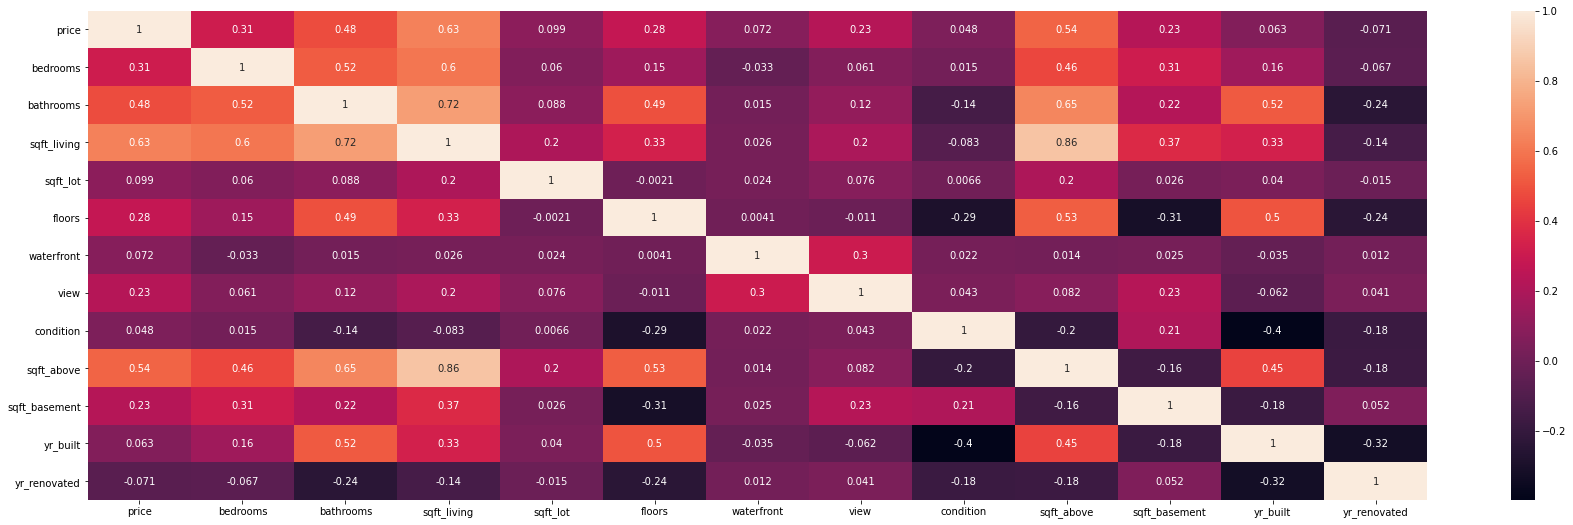

In [233]:
plt.figure(figsize=(30,9))
sns.heatmap(p_house1_corr,annot=True);

In [234]:
for i in p_house1.columns.values.tolist():
    print(p_house1[[i, 'price']].corr())
    print(" ")

       price
price    1.0
 
       price  price
price    1.0    1.0
price    1.0    1.0
 
          bedrooms    price
bedrooms   1.00000  0.30908
price      0.30908  1.00000
 
           bathrooms     price
bathrooms   1.000000  0.476807
price       0.476807  1.000000
 
             sqft_living     price
sqft_living     1.000000  0.631773
price           0.631773  1.000000
 
          sqft_lot     price
sqft_lot  1.000000  0.098622
price     0.098622  1.000000
 
          floors     price
floors  1.000000  0.276608
price   0.276608  1.000000
 
            waterfront     price
waterfront    1.000000  0.072393
price         0.072393  1.000000
 
           view     price
view   1.000000  0.225239
price  0.225239  1.000000
 
           condition     price
condition   1.000000  0.047677
price       0.047677  1.000000
 
            sqft_above     price
sqft_above    1.000000  0.543391
price         0.543391  1.000000
 
               sqft_basement     price
sqft_basement       1.000000  0.22

Only consider variables have high correlation (>0.1)

,bedrooms,price
bedrooms,1.00000,0.30908
price,0.30908,1.00000


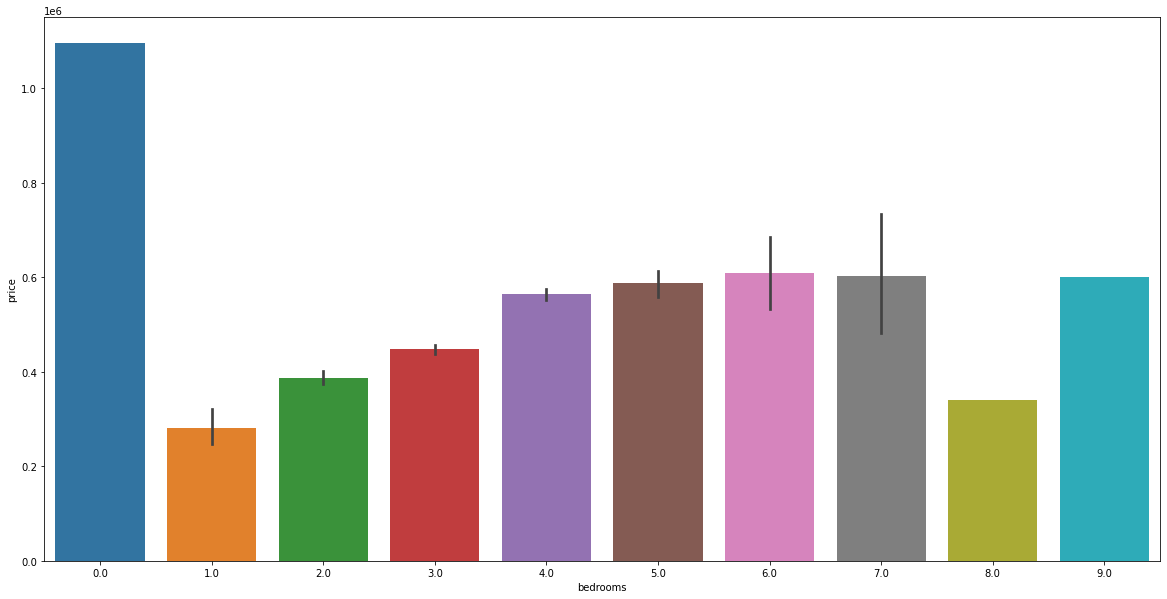

In [236]:
y = 'price'
x = 'bedrooms'
data = p_house1

plt.figure(figsize=(20,10))
sns.barplot(x=x, y=y, data=data)

data[['bedrooms','price']].corr()

,bathrooms,price
bathrooms,1.000000,0.476807
price,0.476807,1.000000


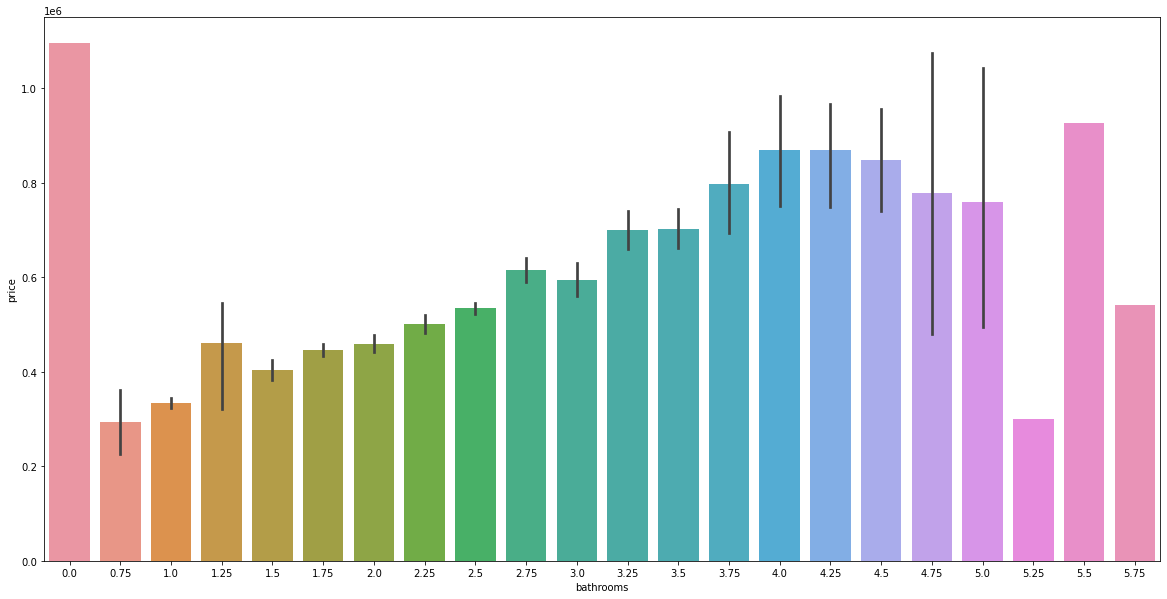

In [237]:
x = 'bathrooms'
y = 'price'
data = p_house1

plt.figure(figsize=(20,10))
sns.barplot(x=x, y=y, data=data)

data[[x,y]].corr()

,sqft_living,price
sqft_living,1.000000,0.631773
price,0.631773,1.000000


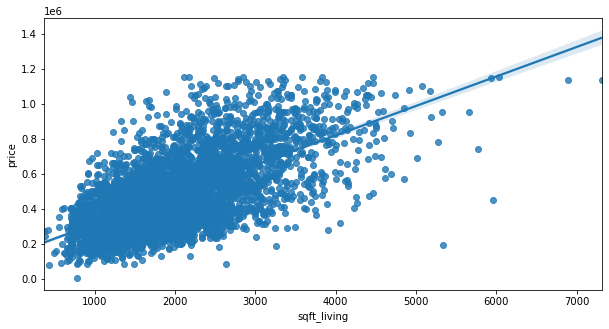

In [238]:
x = 'sqft_living'
y = 'price'
data = p_house1

plt.figure(figsize=(10,5))
sns.regplot(x=x, y=y, data=data)

data[[x,y]].corr()

,floors,price
floors,1.000000,0.276608
price,0.276608,1.000000


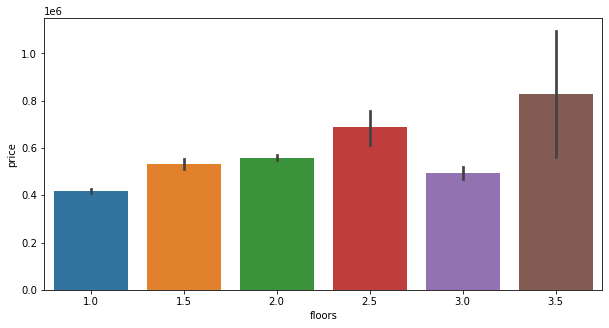

In [239]:
x = 'floors'
y = 'price'
data = p_house1

plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, data=data)

data[[x,y]].corr()

,waterfront,price
waterfront,1.000000,0.072393
price,0.072393,1.000000


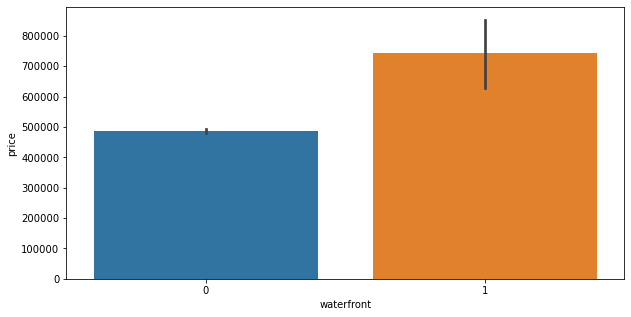

In [240]:
x = 'waterfront'
y = 'price'
data = p_house1

plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, data=data)

data[[x,y]].corr()

,view,price
view,1.000000,0.225239
price,0.225239,1.000000


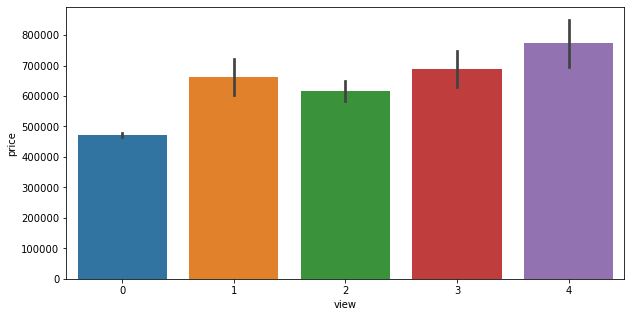

In [241]:
y = 'price'
x = 'view'
data = p_house1

plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, data=data)

data[[x,y]].corr()

,sqft_above,price
sqft_above,1.000000,0.543391
price,0.543391,1.000000


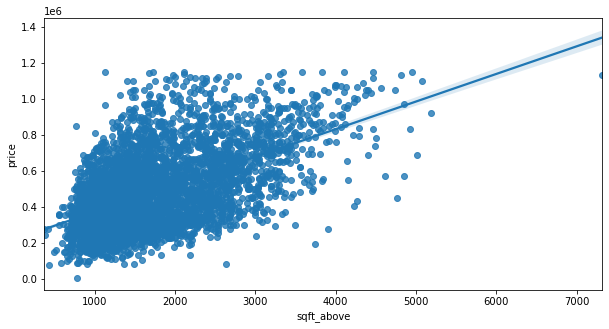

In [242]:
y = 'price'
x = 'sqft_above'
data = p_house1

plt.figure(figsize=(10,5))
sns.regplot(x=x, y=y, data=data)

data[[x,y]].corr()

,sqft_basement,price
sqft_basement,1.000000,0.229384
price,0.229384,1.000000


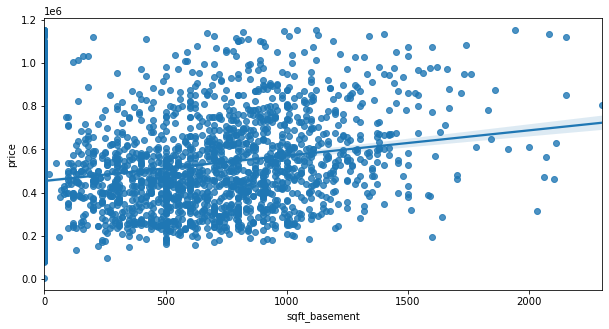

In [243]:
y = 'price'
x = 'sqft_basement'
data = p_house1

plt.figure(figsize=(10,5))
sns.regplot(x=x, y=y, data=data)

data[[x,y]].corr()
